#Classification

In [ ]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

#Loading datasets

In [ ]:
#loading dataset
iris = load_iris()
x= iris.data[:100,:2]
y= iris.target[:100]

In [ ]:
import pandas as pd
df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#Splitting Data

In [ ]:
#Splitting data
X_train,X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)


#Training the model

In [ ]:
# define mmodel and training the data
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

#Making predicitons

In [ ]:
#making predicitons
y_pred = model.predict(X_test)
print(y_test)
print(y_pred)

[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]
[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]


#Evaluating the model

In [ ]:
#Evaluating the model
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


#Visualizing the decision boundary

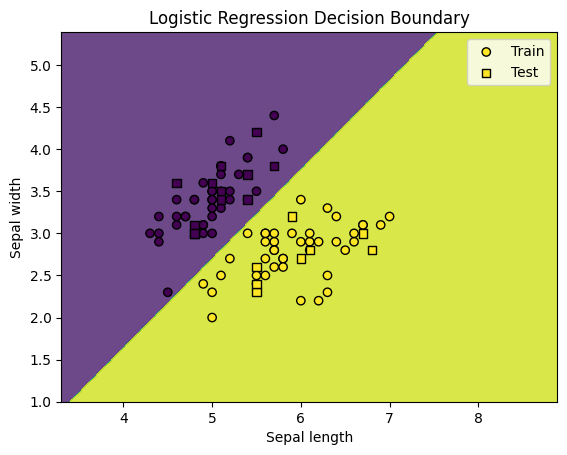

In [ ]:
# Create a meshgrid for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
            edgecolors='k', marker='o', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors
            ='k', marker='s', label='Test')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()

In [ ]:
#inferencing on test data
new_data = np.array([[9.1, 3.5]])
predicted_class = model.predict(new_data)
class_name = iris.target_names[predicted_class[0]]
print(f"Predicted class: {class_name}({predicted_class[0]})")



Predicted class: versicolor(1)


#Confusion matrics

In [ ]:
#confusing matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names[:2])
disp.plot(cmap=plt.cm.blues)
plt.title('Confusion Matrix')
plt.show()


NameError: name 'cm' is not defined

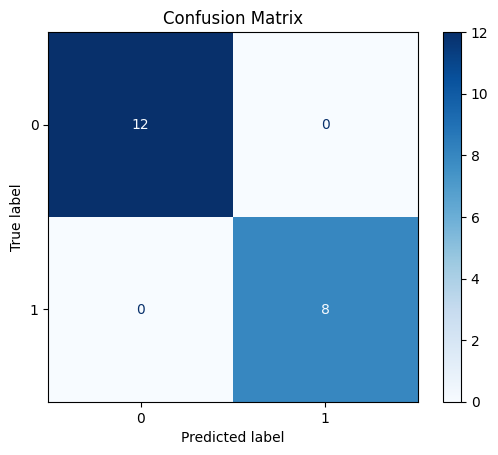

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

#Diabetes Datasets

In [ ]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

#Loading dataset

In [ ]:
#Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes_dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.duplicated().sum()

np.int64(0)

#Correlation

<Axes: >

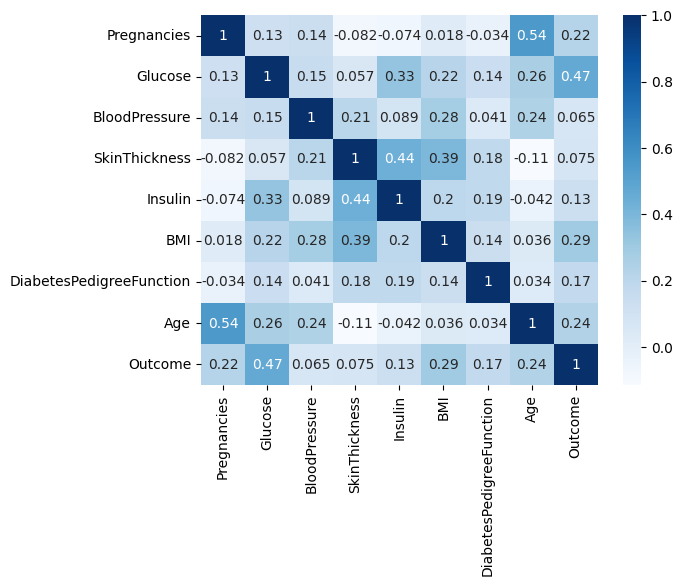

In [ ]:
#heatmap to visualize the correlation
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap='Blues')



In [ ]:
#
print(df.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


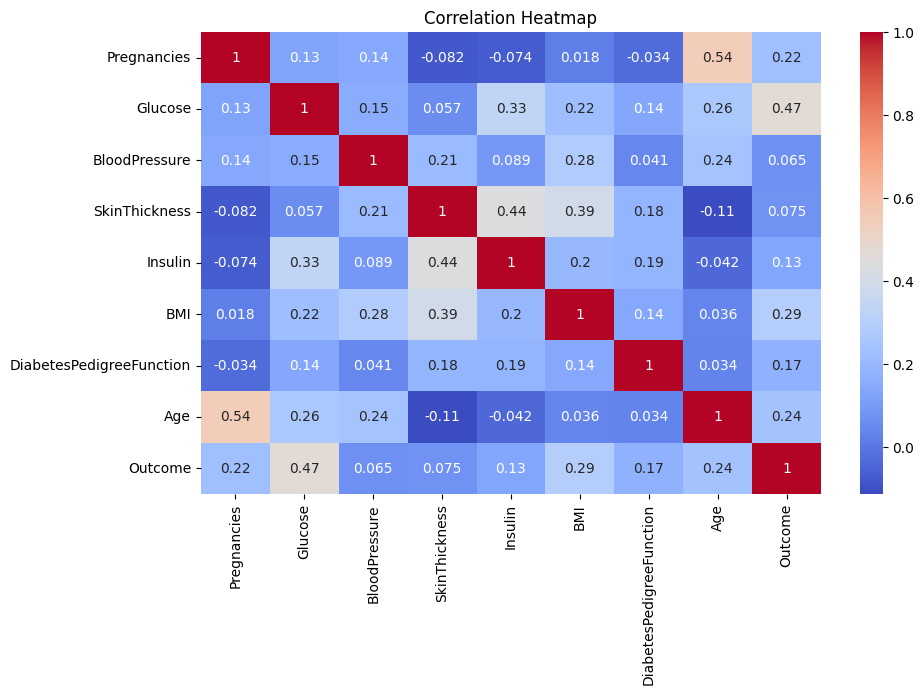

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#make a copy of main file
df_copy = df.copy()

In [ ]:
print(df.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


#finding outliers

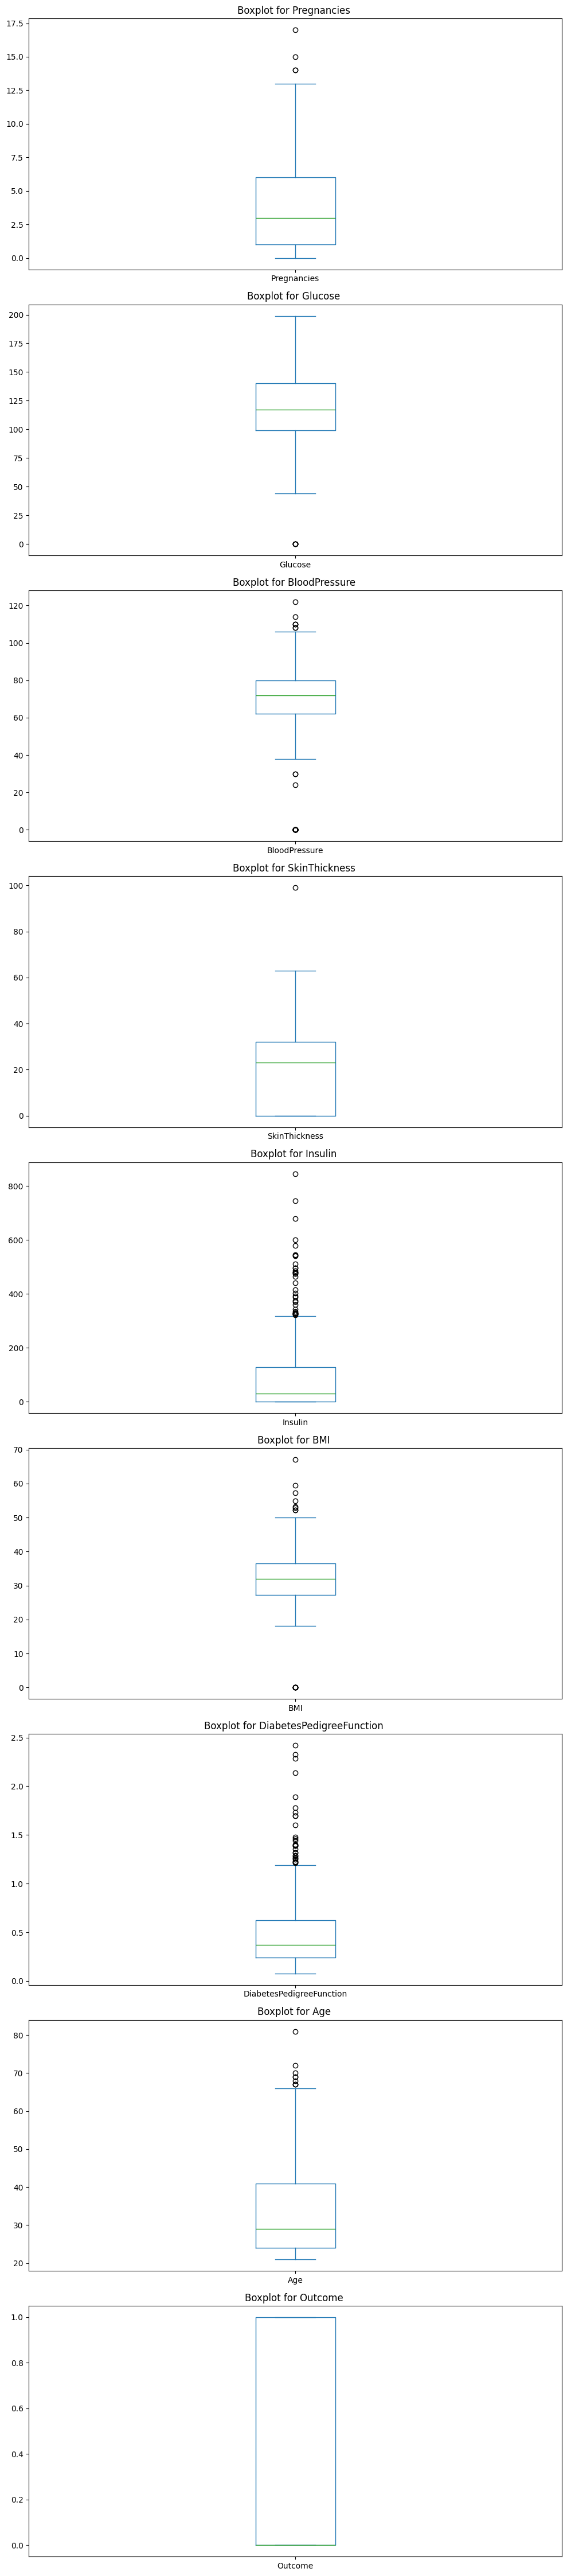

In [ ]:
numeric_cols = df_copy.select_dtypes(include='number')
numeric_cols.plot(kind='box', subplots=True, layout=(len(numeric_cols.columns), 1),
                  figsize=(10, 5 * len(numeric_cols.columns)), sharex=False,
                   title=[f'Boxplot for {col} ' for col in numeric_cols.columns])

plt.tight_layout()
plt.show()

In [ ]:
#Handling the outliers
# Calculate IQR for a specific column (e.g., 'Runtime')
Q1 = df_copy['Insulin'].quantile(0.25)
Q3 = df_copy['Insulin'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# aba bound vitra value xaina vane tyo row nai drop hunxa
df_copy = df_copy[(df_copy["Insulin"]<=upper_bound) & (df_copy["Insulin"]>=lower_bound) ]

In [ ]:
# Calculate IQR for a specific column (e.g., 'Runtime')
Q1 = df_copy['BMI'].quantile(0.25)
Q3 = df_copy['BMI'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# aba bound vitra value xaina vane tyo row nai drop hunxa
df_copy = df_copy[(df_copy["BMI"]<=upper_bound) & (df_copy["BMI"]>=lower_bound) ]

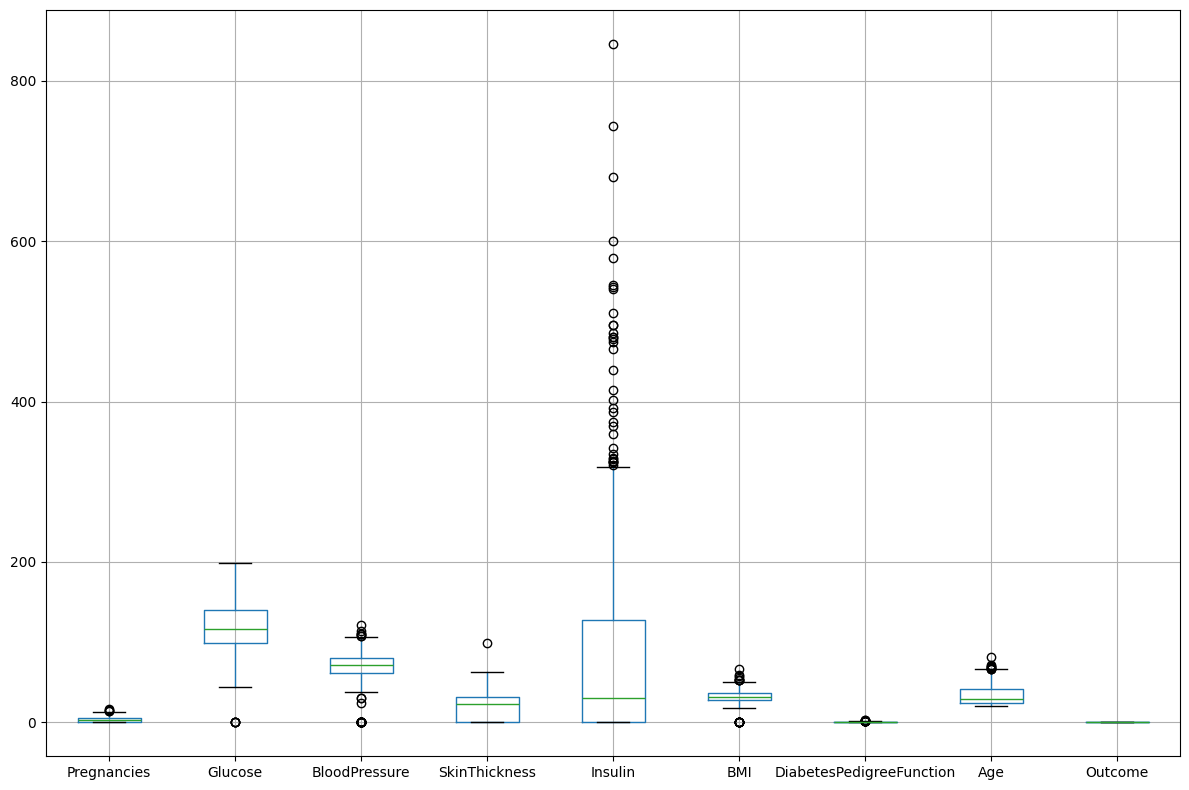

In [ ]:
#
plt.figure(figsize=(12,8))
df.boxplot()
plt.tight_layout()


In [ ]:
numeric_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction','Age']
for col in numeric_cols:
    Q1 = df_copy[col].quantile(0.25)
    Q3 = df_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_copy = df_copy[(df_copy[col] >= lower_bound) & (df_copy[col] <=upper_bound)]

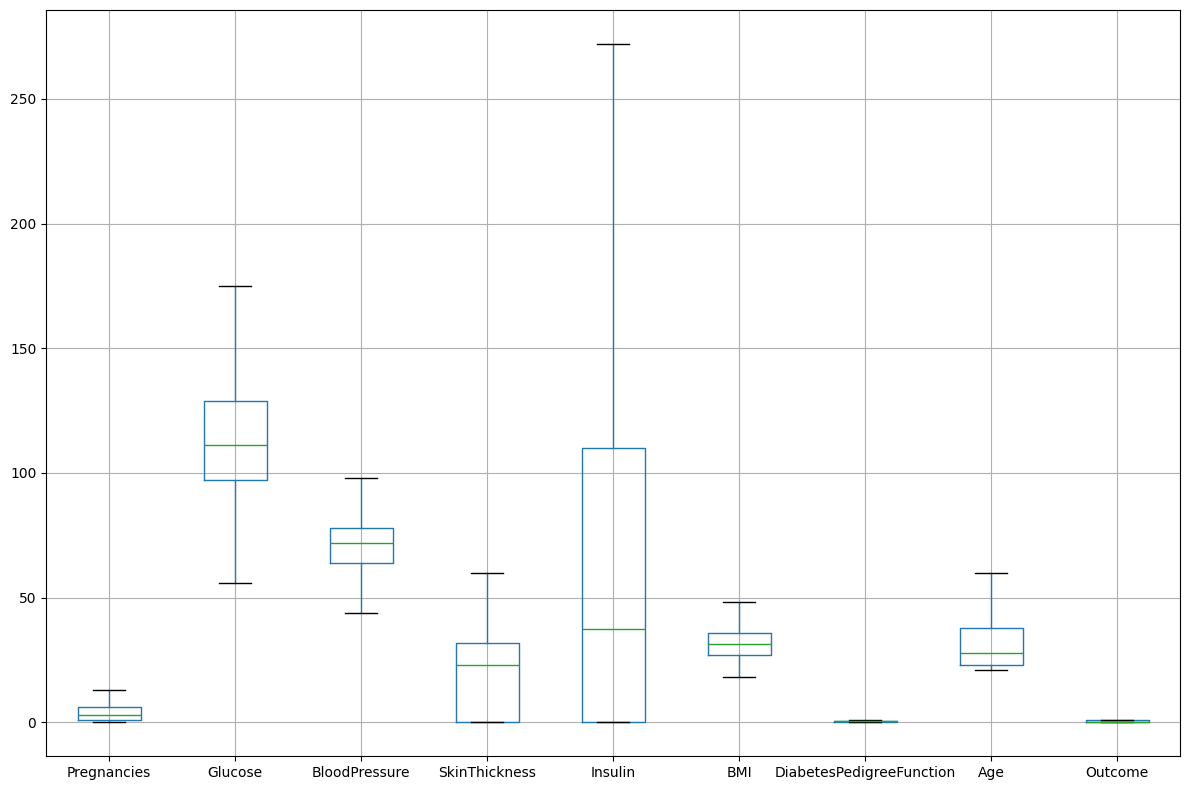

In [ ]:
plt.figure(figsize=(12,8))
df_copy.boxplot()
plt.tight_layout()

#Splitting data

In [ ]:
#splitting the data
X_train,X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)


In [ ]:
# define mmodel and training the data
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

#Making predictions

In [ ]:
#making predicitions
y_pred = model.predict(X_test)
print(y_test)
print(y_pred)

[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]
[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]


#Evaluating the model

In [ ]:
#evaluating the model
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00
